In [171]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [172]:
wine = pd.read_csv('winequality-red.csv')

In [173]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
#checking null values and dataTypes
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int64
 1   volatile acidity      1599 non-null   int64
 2   citric acid           1599 non-null   int64
 3   residual sugar        1599 non-null   int64
 4   chlorides             1599 non-null   int64
 5   free sulfur dioxide   1599 non-null   int64
 6   total sulfur dioxide  1599 non-null   int64
 7   density               1599 non-null   int64
 8   pH                    1599 non-null   int64
 9   sulphates             1599 non-null   int64
 10  alcohol               1599 non-null   int64
 11  quality               1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


In [12]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
wine.shape

(1599, 12)

In [16]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
string_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']


In [23]:
#scaling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in string_columns:
    wine[i]= le.fit_transform(wine[i])

In [24]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,2
1,31,112,0,22,61,25,61,271,32,30,17,2
2,31,88,4,17,55,15,48,287,38,27,17,2
3,65,12,56,10,38,17,54,354,28,20,17,3
4,27,76,0,10,39,11,28,342,63,18,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,15,56,8,11,53,32,38,119,57,20,26,2
1595,12,47,10,15,25,40,45,135,64,38,36,3
1596,16,42,13,17,39,29,34,185,54,37,33,3
1597,12,65,12,11,38,32,38,164,69,33,23,2


In [26]:
import seaborn as sns

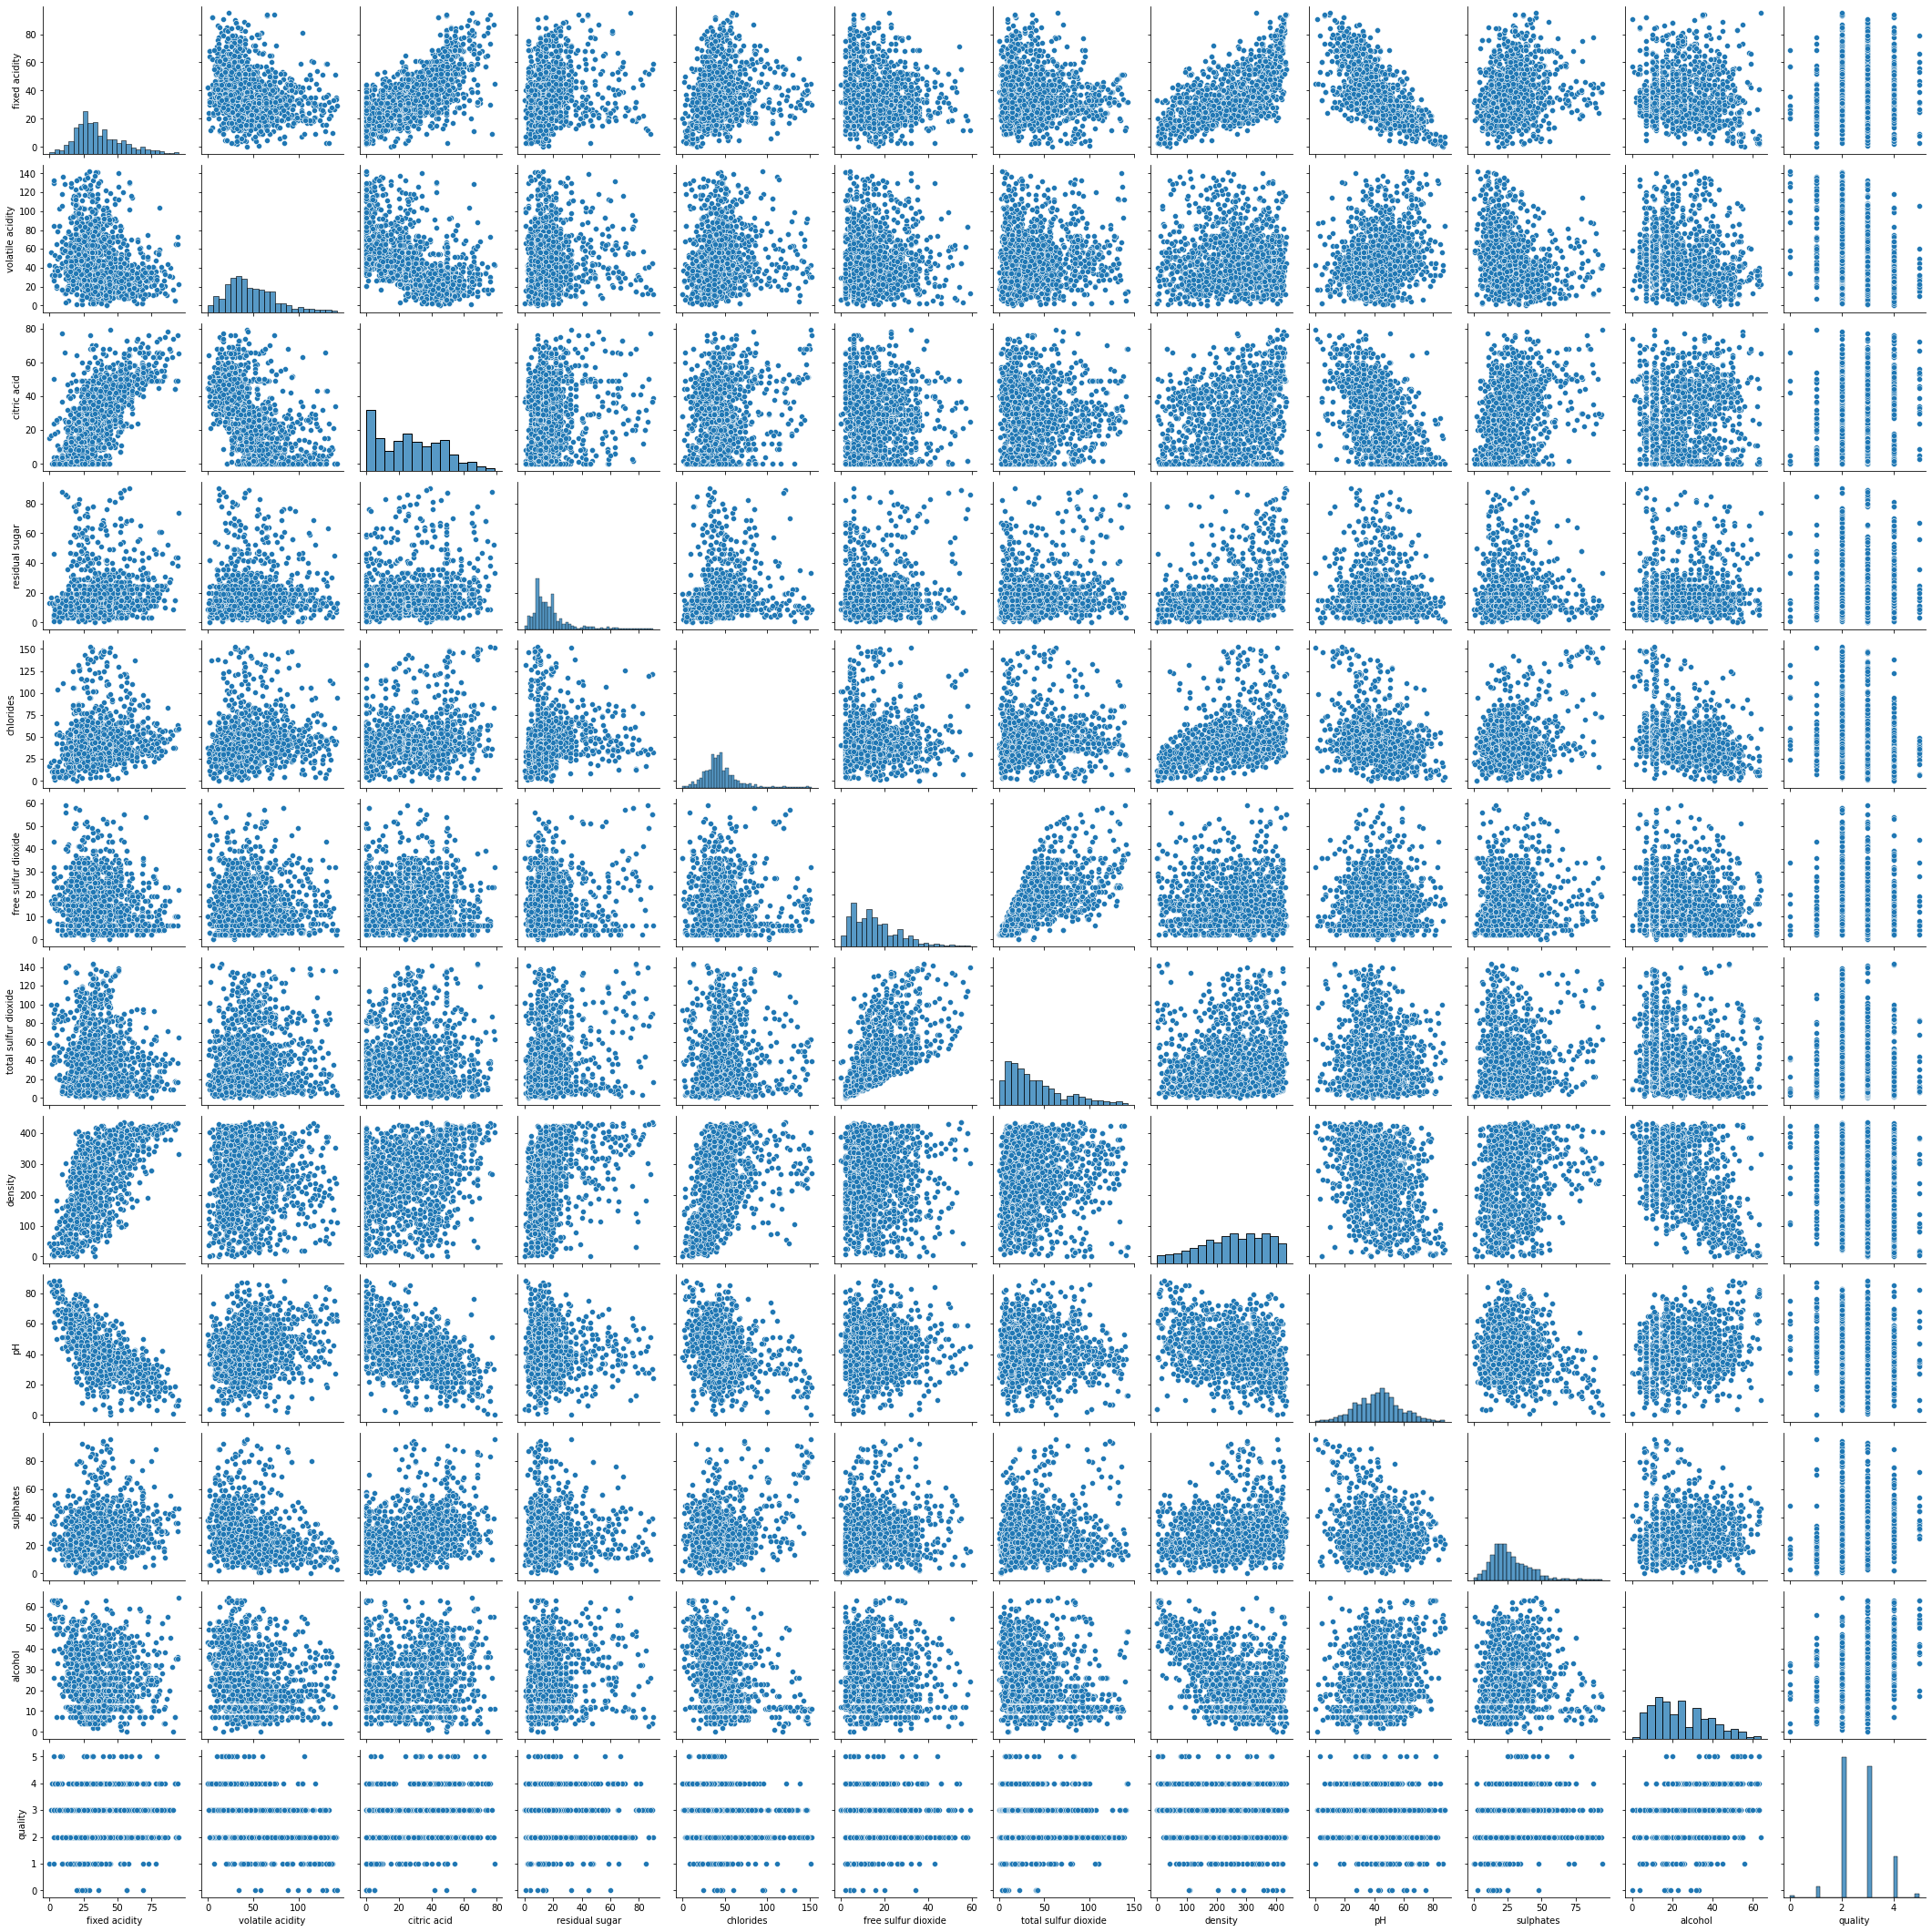

In [28]:
sns.pairplot(wine)

<AxesSubplot:>

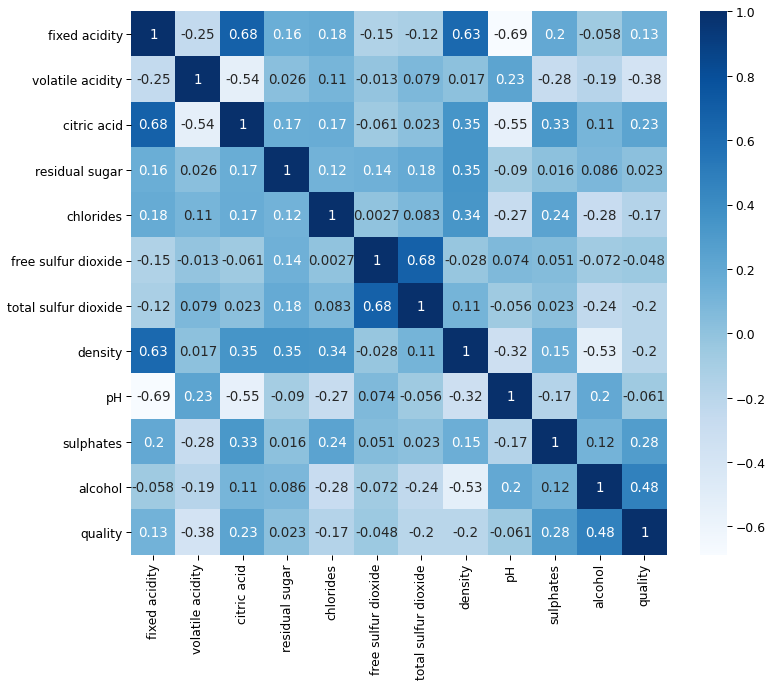

In [33]:
#heatmap to check correlation between columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)

corr_wine = wine.corr()

sns.heatmap(corr_wine, annot = True, cmap= 'Blues' )

no value is exceeding than 0.68 the data seems to have less collinearity

## checking duplicate values

In [35]:
wine[wine.duplicated()].shape

(240, 12)

In [36]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,27,76,0,10,39,11,28,342,63,18,11,2
11,28,41,36,64,34,17,96,342,47,42,26,2
27,32,33,21,5,69,10,31,256,29,53,12,2
40,26,35,36,62,37,12,82,342,45,45,26,2
65,25,81,5,50,49,3,5,221,53,2,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,25,75,13,11,39,12,14,163,41,16,22,2
1564,25,75,13,11,39,12,14,163,41,16,22,2
1567,25,75,13,11,39,12,14,163,41,16,22,2
1581,15,48,9,7,16,24,26,75,66,22,37,2


In [37]:
wine1 = wine.drop_duplicates()

In [38]:
wine1[wine1.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [40]:
wine1.shape

(1359, 12)

In [51]:
#renaming the coloumns
wine2 = wine1.rename({'fixed acidity':'fa','volatile acidity':'va','citric acid':'ca'
                      ,'residual sugar':'rs','free sulfur dioxide':'fsd','total sulfur dioxide':'tsd'},axis=1)

In [52]:
wine2

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,2
1,31,112,0,22,61,25,61,271,32,30,17,2
2,31,88,4,17,55,15,48,287,38,27,17,2
3,65,12,56,10,38,17,54,354,28,20,17,3
5,27,68,0,9,38,13,34,342,63,18,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,21,60,8,10,31,28,32,249,54,44,12,3
1594,15,56,8,11,53,32,38,119,57,20,26,2
1595,12,47,10,15,25,40,45,135,64,38,36,3
1597,12,65,12,11,38,32,38,164,69,33,23,2


## preparing a model

In [53]:
wine2.columns

Index(['fa', 'va', 'ca', 'rs', 'chlorides', 'fsd', 'tsd', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [59]:
import statsmodels.formula.api as smf
model = smf.ols('quality~fa+va+ca+rs+chlorides+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     70.43
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.41e-124
Time:                        13:18:08   Log-Likelihood:                -1355.3
No. Observations:                1359   AIC:                             2735.
Df Residuals:                    1347   BIC:                             2797.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5284      0.144     17.535      0.000       2.246       2.811
fa             0.0016      0.003      0.587      0.557      -0.004       0.007
va            -0.0068      0.001     -8.314      0.000      -0.008      -0.005
ca            -0.0018      0.002     -1.136      0.256      -0.005       0.001
rs             0.0008      0.002      0.539      0.590      -0.002       0.004
chlorides     -0.0035      0.001     -3.934      0.000      -0.005      -0.002
fsd            0.0038      0.002      1.559      0.119      -0.001       0.008
tsd           -0.0029      0.001     -3.320      0.001      -0.005      -0.001
density       -0.0001      0.000     -0.293      0.770      -0.001       0.001
pH            -0.0046      0.002     -2.159      0.031      -0.009      -0.000
sulphates      0.0103      0.001      7.706      0.000       0.008       0.013
alcohol        0.0225      0.002      9.604      0.000       0.018       0.027
==============================================================================
Omnibus:                       24.399   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.327
Skew:                          -0.195   Prob(JB):                     3.52e-08
Kurtosis:                       3.674   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#summary

-r squared value is less than 0.85, which is considered to be bad because it represents poor model

-AIC value is high, which also indicates that it's not a good model


In [61]:
model.params

Intercept    2.528363
fa           0.001582
va          -0.006795
ca          -0.001781
rs           0.000829
chlorides   -0.003465
fsd          0.003757
tsd         -0.002851
density     -0.000114
pH          -0.004612
sulphates    0.010327
alcohol      0.022492
dtype: float64

In [63]:
print(model.tvalues,'\n', model.pvalues)

Intercept    17.535086
fa            0.586863
va           -8.314248
ca           -1.135512
rs            0.538812
chlorides    -3.934487
fsd           1.559255
tsd          -3.320421
density      -0.292538
pH           -2.159081
sulphates     7.706353
alcohol       9.603892
dtype: float64 
 Intercept    3.646500e-62
fa           5.573941e-01
va           2.231723e-16
ca           2.563630e-01
rs           5.901057e-01
chlorides    8.762552e-05
fsd          1.191709e-01
tsd          9.228717e-04
density      7.699206e-01
pH           3.101998e-02
sulphates    2.498284e-14
alcohol      3.602735e-21
dtype: float64


In [64]:
(model.rsquared,model.rsquared_adj)

(0.3651571192576262, 0.3599728047155578)

## calculating VIF

In [76]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_fa = smf.ols('fa~va+ca+rs+chlorides+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_fa = 1/(1-rsq_fa)

rsq_va = smf.ols('va~fa+ca+rs+chlorides+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_va = 1/(1-rsq_va)

rsq_ca = smf.ols('ca~va+fa+rs+chlorides+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_ca = 1/(1-rsq_ca)

rsq_rs = smf.ols('rs~va+ca+fa+chlorides+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_rs = 1/(1-rsq_rs)

rsq_chlorides = smf.ols('chlorides~va+ca+rs+fa+fsd+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_chlorides = 1/(1-rsq_chlorides)

rsq_fsd = smf.ols('fsd~va+ca+rs+fa+chlorides+tsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_fsd = 1/(1-rsq_fsd)

rsq_tsd = smf.ols('tsd~va+ca+rs+fa+chlorides+fsd+density+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_tsd = 1/(1-rsq_tsd)

rsq_density = smf.ols('density~va+ca+rs+fa+chlorides+tsd+fsd+pH+sulphates+alcohol', data=wine2).fit().rsquared
vif_density = 1/(1-rsq_density)

rsq_pH = smf.ols('pH~va+ca+rs+fa+chlorides+tsd+density+fsd+sulphates+alcohol', data=wine2).fit().rsquared
vif_pH = 1/(1-rsq_pH)

rsq_sulphates = smf.ols('sulphates~va+ca+rs+fa+chlorides+tsd+density+pH+fsd+alcohol', data=wine2).fit().rsquared
vif_sulphates = 1/(1-rsq_sulphates)

rsq_alcohol = smf.ols('alcohol~va+ca+rs+fa+chlorides+tsd+density+pH+sulphates+fsd', data=wine2).fit().rsquared
vif_alcohol = 1/(1-rsq_alcohol)

#storing values in a dataframe
D1 = {'variables':['fa','va','ca','rs','chlorides','fsd','tsd','density','pH','sulphates','alcohol'],'vif':[vif_fa,vif_va,vif_ca,vif_rs,vif_chlorides,vif_fsd,vif_tsd,vif_density,vif_pH,vif_sulphates,vif_alcohol]}
vif_frame=pd.DataFrame(D1)
vif_frame

,variables,vif
0,fa,6.662054
1,va,1.681614
2,ca,2.926889
3,rs,1.595292
4,chlorides,1.396721
5,fsd,2.028423
6,tsd,2.322219
7,density,5.732449
8,pH,3.237505
9,sulphates,1.351419


In [77]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

## logistic regression model

In [206]:
x = wine2.iloc[:,:11]
y = wine2.iloc[:,11]
y.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [226]:
def new_quality_rating(rating):
    '''This function will change the target quality rating to 0, 1 or 2.
       The number of target labels will be reduced to 3 instead of 6'''
    if (rating == 3 or rating == 2 or rating== 0):
        return 0
    elif (rating == 5 or rating == 4 or rating==1):
        return 1
   # else:
     #   return 2   

In [227]:
wine2['new_quality'] = wine2['quality'].apply(new_quality_rating)

In [228]:
x = wine2.iloc[:,:10]
y = wine2.iloc[:,12]
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: new_quality, Length: 1359, dtype: int64

In [229]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [230]:
#predict for x dataset
y_pred = classifier.predict(x)

In [231]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [232]:
#dataframe for predicted y and actual y
y_pred_df = pd.DataFrame({'actual y': y, 'predicted y': classifier.predict(x)})


In [233]:
y_pred_df.head(40)

,actual y,predicted y
0,0,0
1,0,0
2,0,0
3,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0
10,0,0


In [234]:
#confusion matrix for y and y_pred
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[1093   29]
 [ 190   47]]


In [235]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1122
           1       0.62      0.20      0.30       237

    accuracy                           0.84      1359
   macro avg       0.74      0.59      0.60      1359
weighted avg       0.81      0.84      0.80      1359



In [236]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y, y_pred))

Accuracy 0.8388520971302428


Text(0, 0.5, 'True Positive Rate')

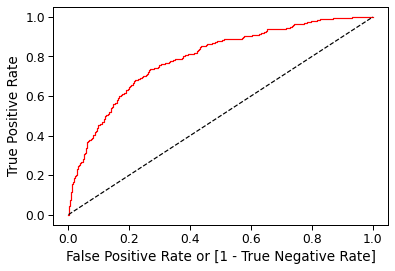

In [237]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
